In [63]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold,StratifiedShuffleSplit
from icecream import ic
from sklearn.preprocessing import LabelEncoder

In [64]:
consumer_credit=pd.read_csv("D:/HALDEN/downloads/store-sales-time-series-forecasting/oil.csv")
ic(consumer_credit.shape)
print(consumer_credit.head(10))

ic| consumer_credit.shape: (1218, 2)


         date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20
5  2013-01-08       93.21
6  2013-01-09       93.08
7  2013-01-10       93.81
8  2013-01-11       93.60
9  2013-01-14       94.27


create time dummy by counting out the lenght of the series

In [65]:
consumer_credit['Time']=np.arange(len(consumer_credit.index))
consumer_credit.head()

,date,dcoilwtico,Time
0,2013-01-01,NaN,0
1,2013-01-02,93.14,1
2,2013-01-03,92.97,2
3,2013-01-04,93.12,3
4,2013-01-07,93.20,4


Text(0.5, 1.0, 'Time Plot of index')

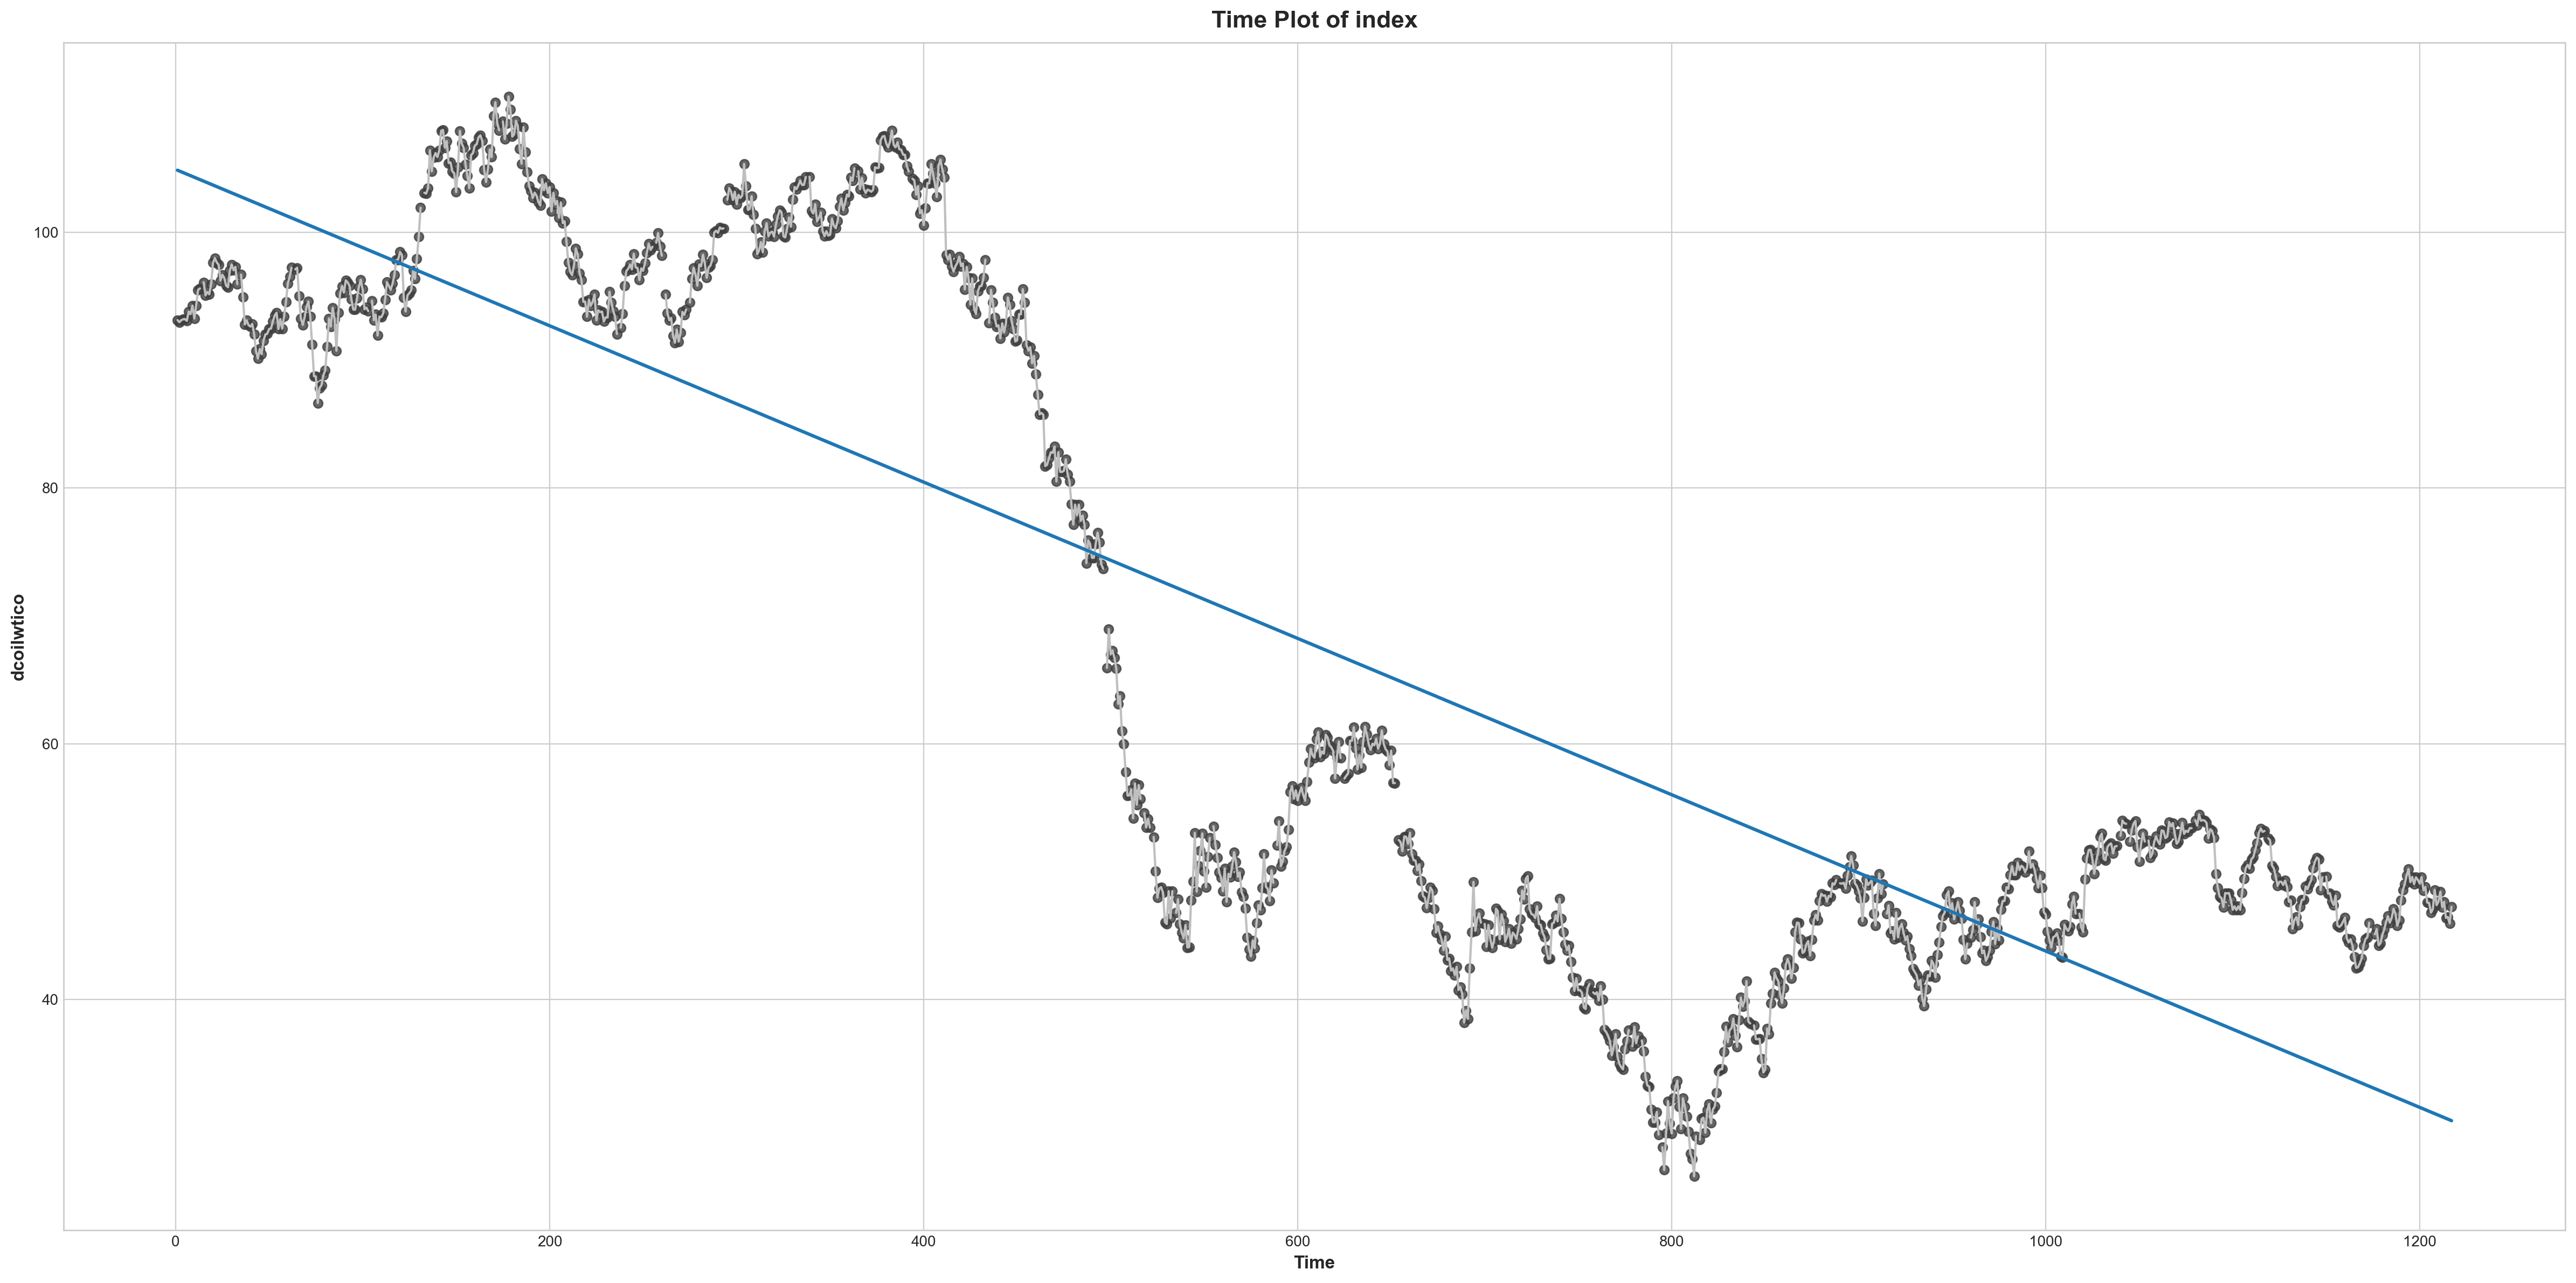

In [66]:
plt.style.use('seaborn-whitegrid')
plt.rc(
    "figure",
    autolayout=True,
    figsize=(24, 12),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'
fig, ax=plt.subplots()
ax.plot("Time",'dcoilwtico',data=consumer_credit,color='0.75')
ax=sns.regplot(x='Time',y="dcoilwtico", data=consumer_credit,ci=None,scatter_kws={'color':'0.25'})
ax.set_title("Time Plot of index")

In [67]:
consumer_credit['lag_1']=consumer_credit['dcoilwtico'].shift(1)

consumer_credit.head(20)

,date,dcoilwtico,Time,lag_1
0,2013-01-01,NaN,0,NaN
1,2013-01-02,93.14,1,NaN
2,2013-01-03,92.97,2,93.14
3,2013-01-04,93.12,3,92.97
4,2013-01-07,93.20,4,93.12
5,2013-01-08,93.21,5,93.20
6,2013-01-09,93.08,6,93.21
7,2013-01-10,93.81,7,93.08
8,2013-01-11,93.60,8,93.81
9,2013-01-14,94.27,9,93.60


In [68]:
consumer_credit=consumer_credit.dropna(subset=['lag_1'])
consumer_credit

,date,dcoilwtico,Time,lag_1
2,2013-01-03,92.97,2,93.14
3,2013-01-04,93.12,3,92.97
4,2013-01-07,93.20,4,93.12
5,2013-01-08,93.21,5,93.20
6,2013-01-09,93.08,6,93.21
...,...,...,...,...
1213,2017-08-25,47.65,1213,47.24
1214,2017-08-28,46.40,1214,47.65
1215,2017-08-29,46.46,1215,46.40
1216,2017-08-30,45.96,1216,46.46


Text(0.5, 1.0, 'Lag Plot of oil Sales')

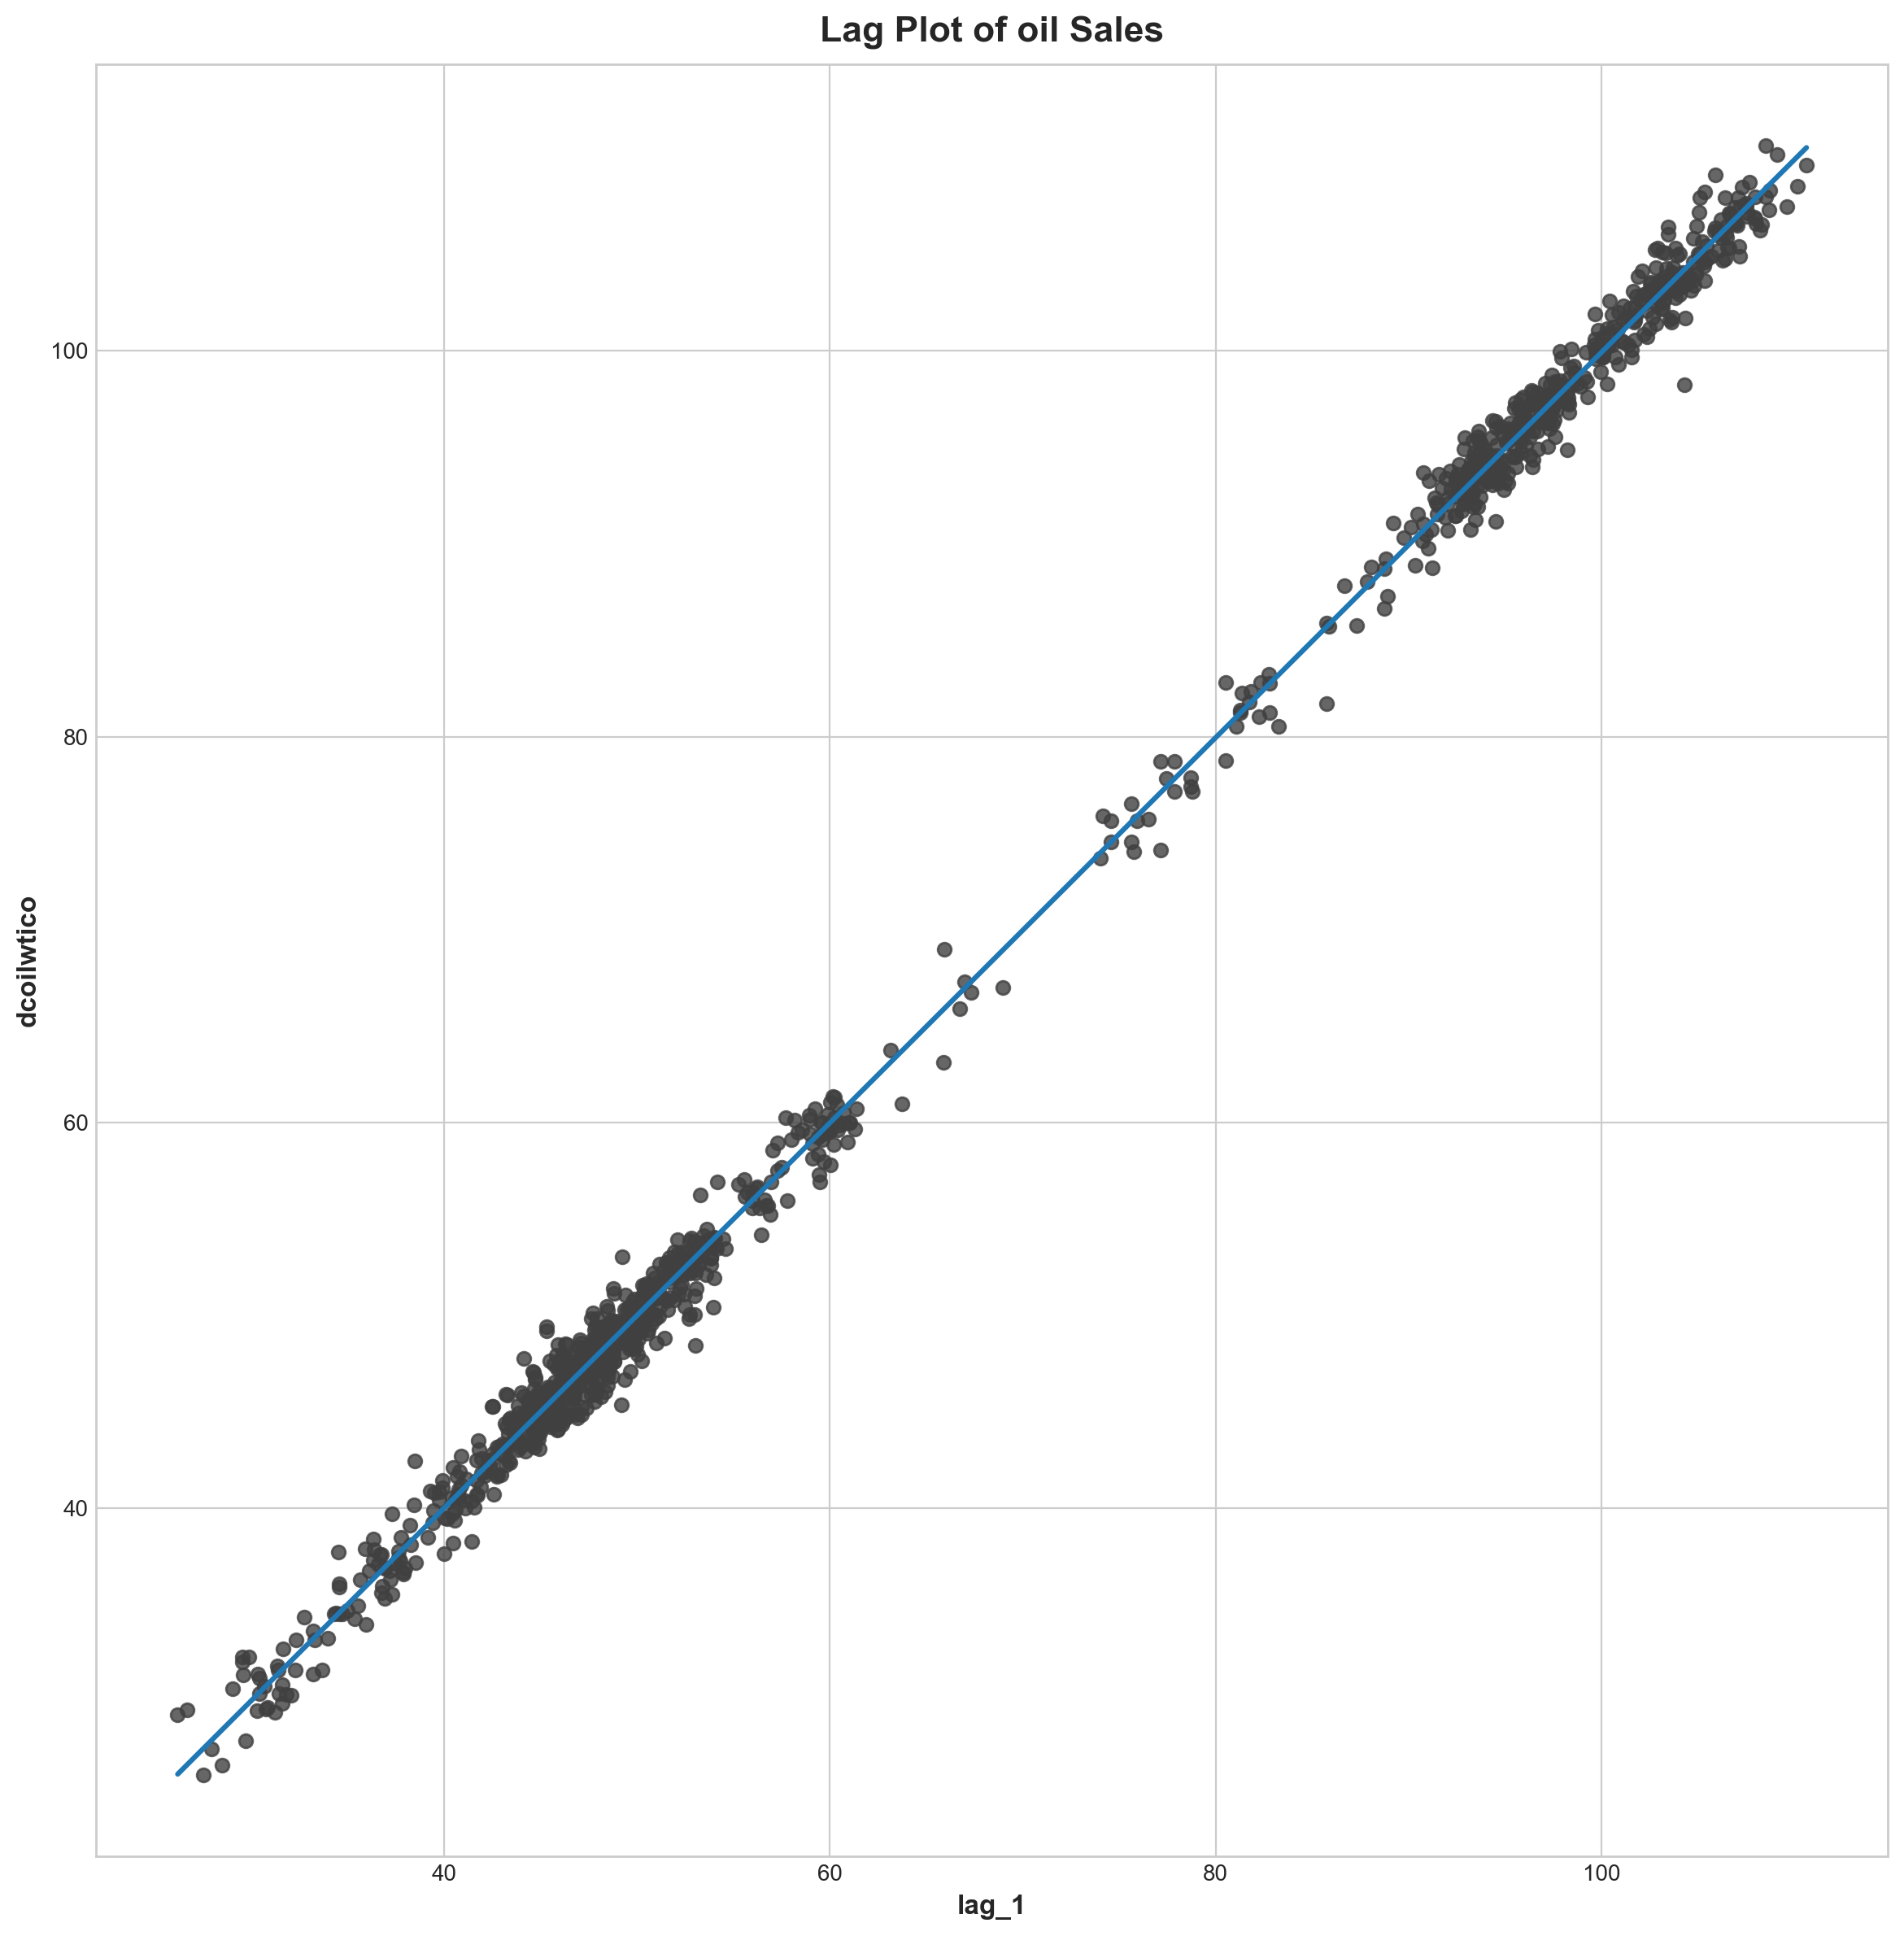

In [69]:
fig, ax = plt.subplots()
ax = sns.regplot(x='lag_1', y='dcoilwtico', data=consumer_credit, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of oil Sales')


In [70]:
from sklearn.linear_model import LinearRegression
X=consumer_credit.loc[:,['Time']]
y=consumer_credit.loc[:,'dcoilwtico']

model=LinearRegression()
model.fit(X,y)

y_pred=pd.Series(model.predict(X),index=X.index)

ValueError: Input y contains NaN.

Text(0.5, 1.0, 'time plot of oil sales')

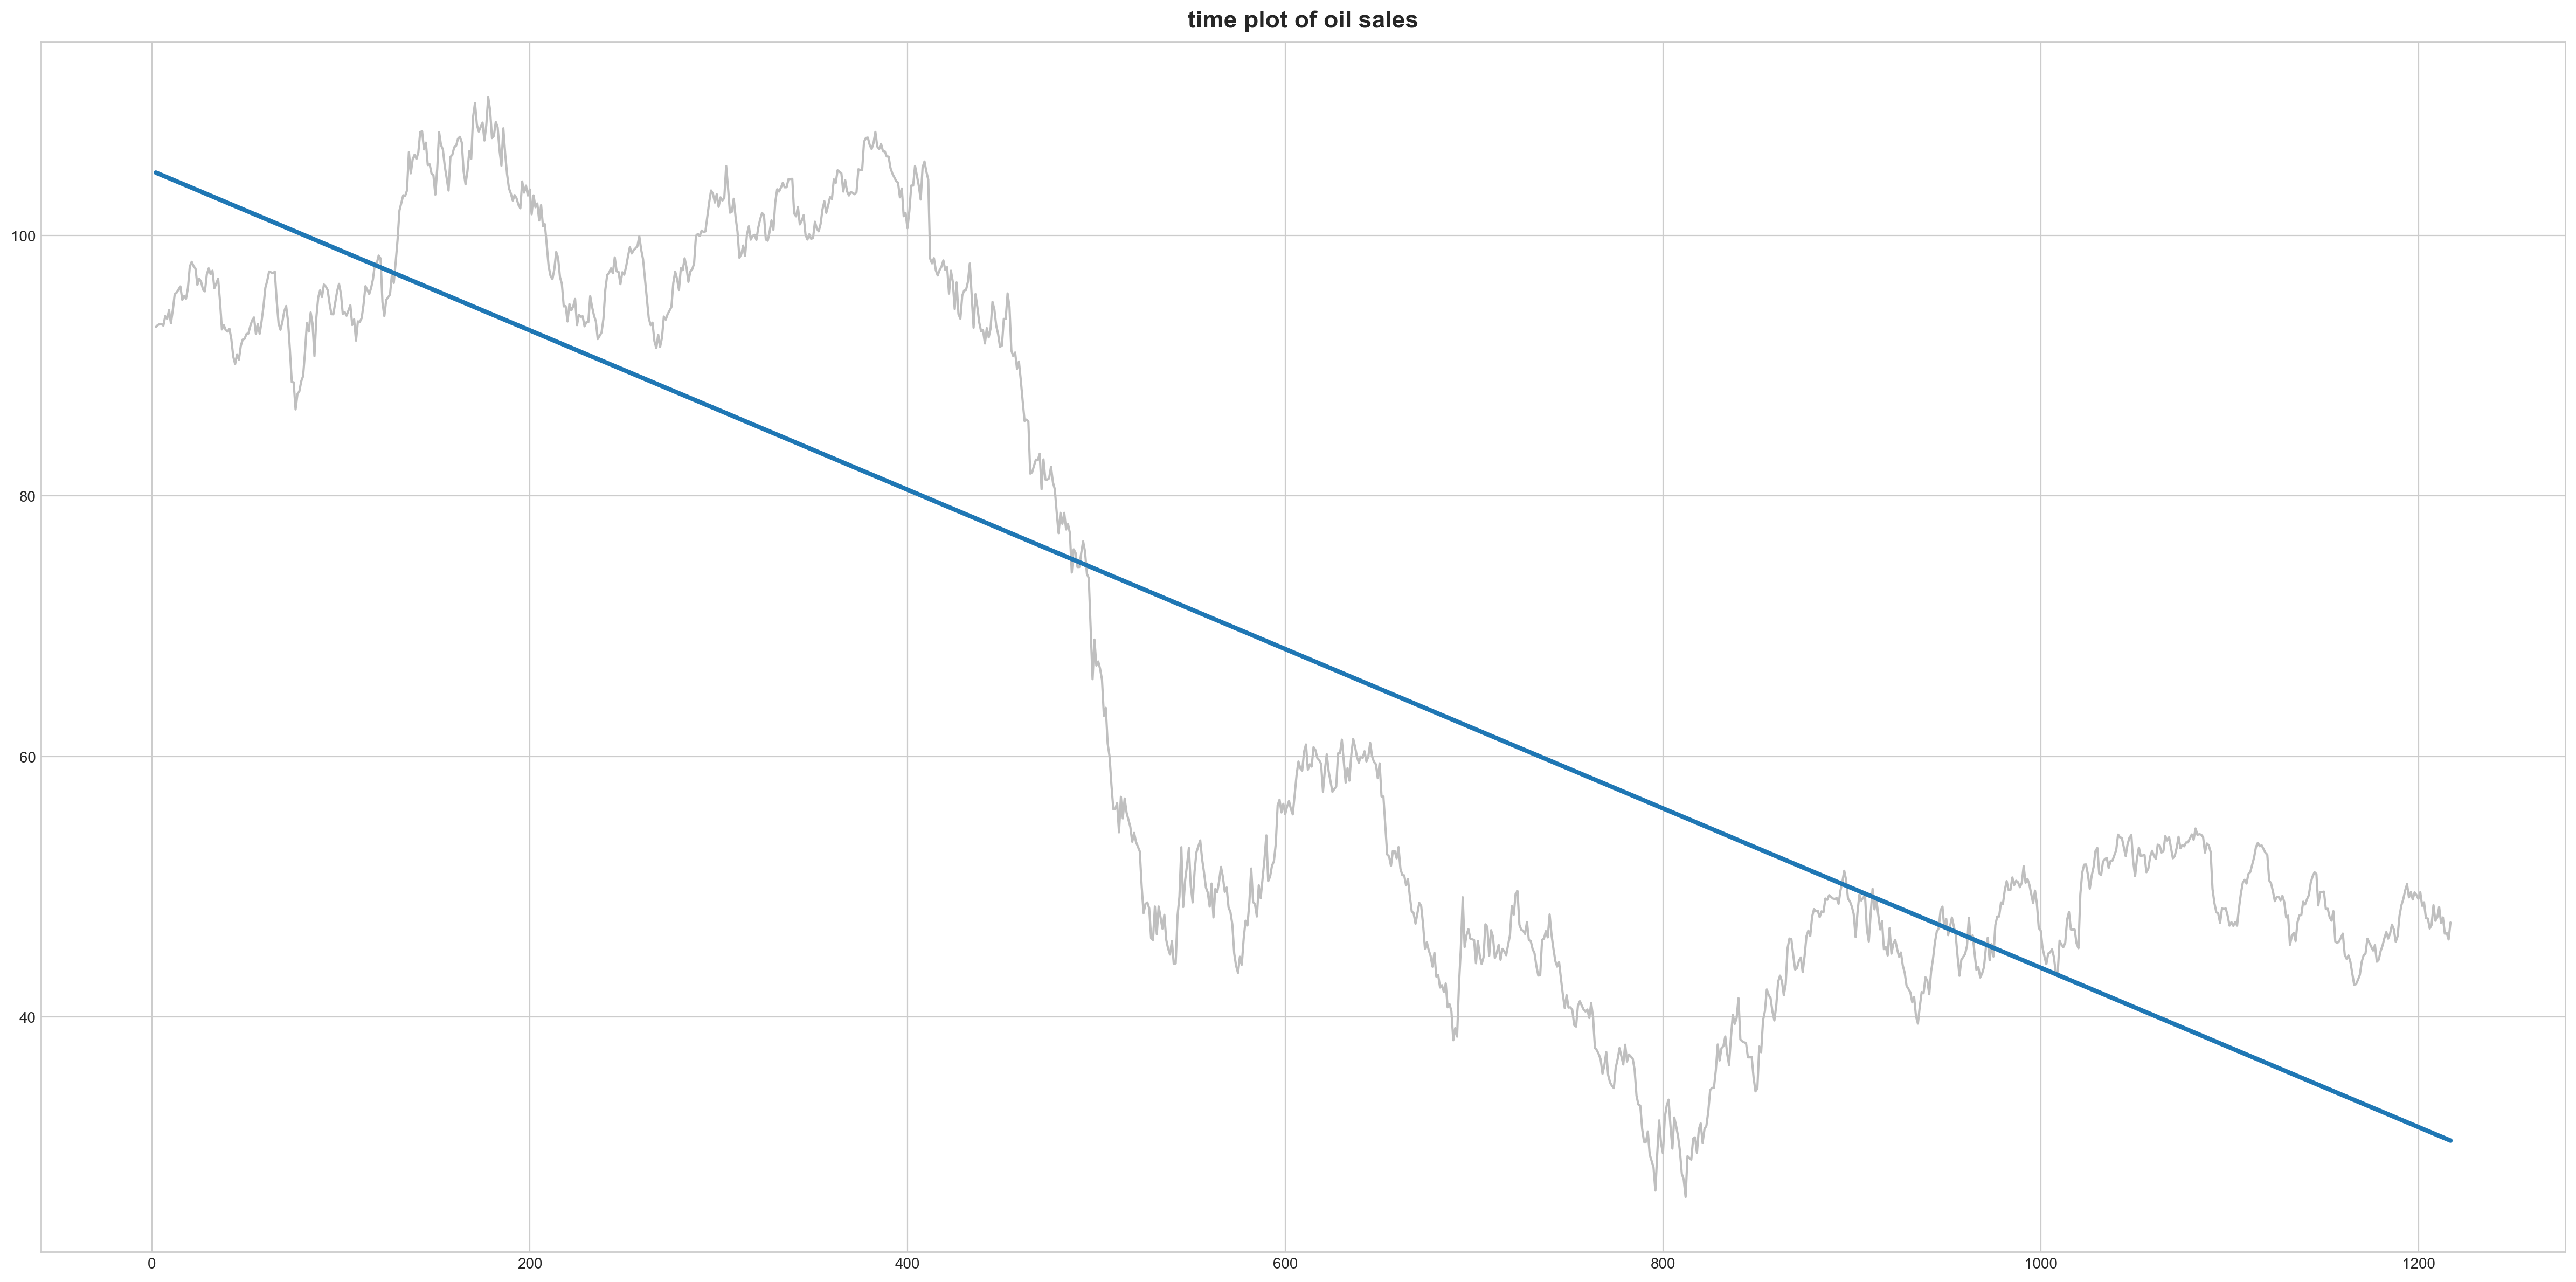

In [ ]:
ax=y.plot(kind='line', color='0.75')
ax=y_pred.plot(ax=ax,linewidth=3)
ax.set_title("time plot of oil sales")

In [ ]:

consumer_credit['lag_1']=consumer_credit['dcoilwtico'].shift(1)
consumer_credit.head()

,date,dcoilwtico,Time,lag_1
2,2013-01-03,92.97,2,NaN
3,2013-01-04,93.12,3,92.97
4,2013-01-07,93.20,4,93.12
5,2013-01-08,93.21,5,93.20
6,2013-01-09,93.08,6,93.21


In [ ]:
from sklearn.linear_model import LinearRegression

X = consumer_credit.loc[:, ['lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = consumer_credit.loc[:, 'dcoilwtico']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

Text(0.5, 1.0, 'Lag Plot of oil sales')

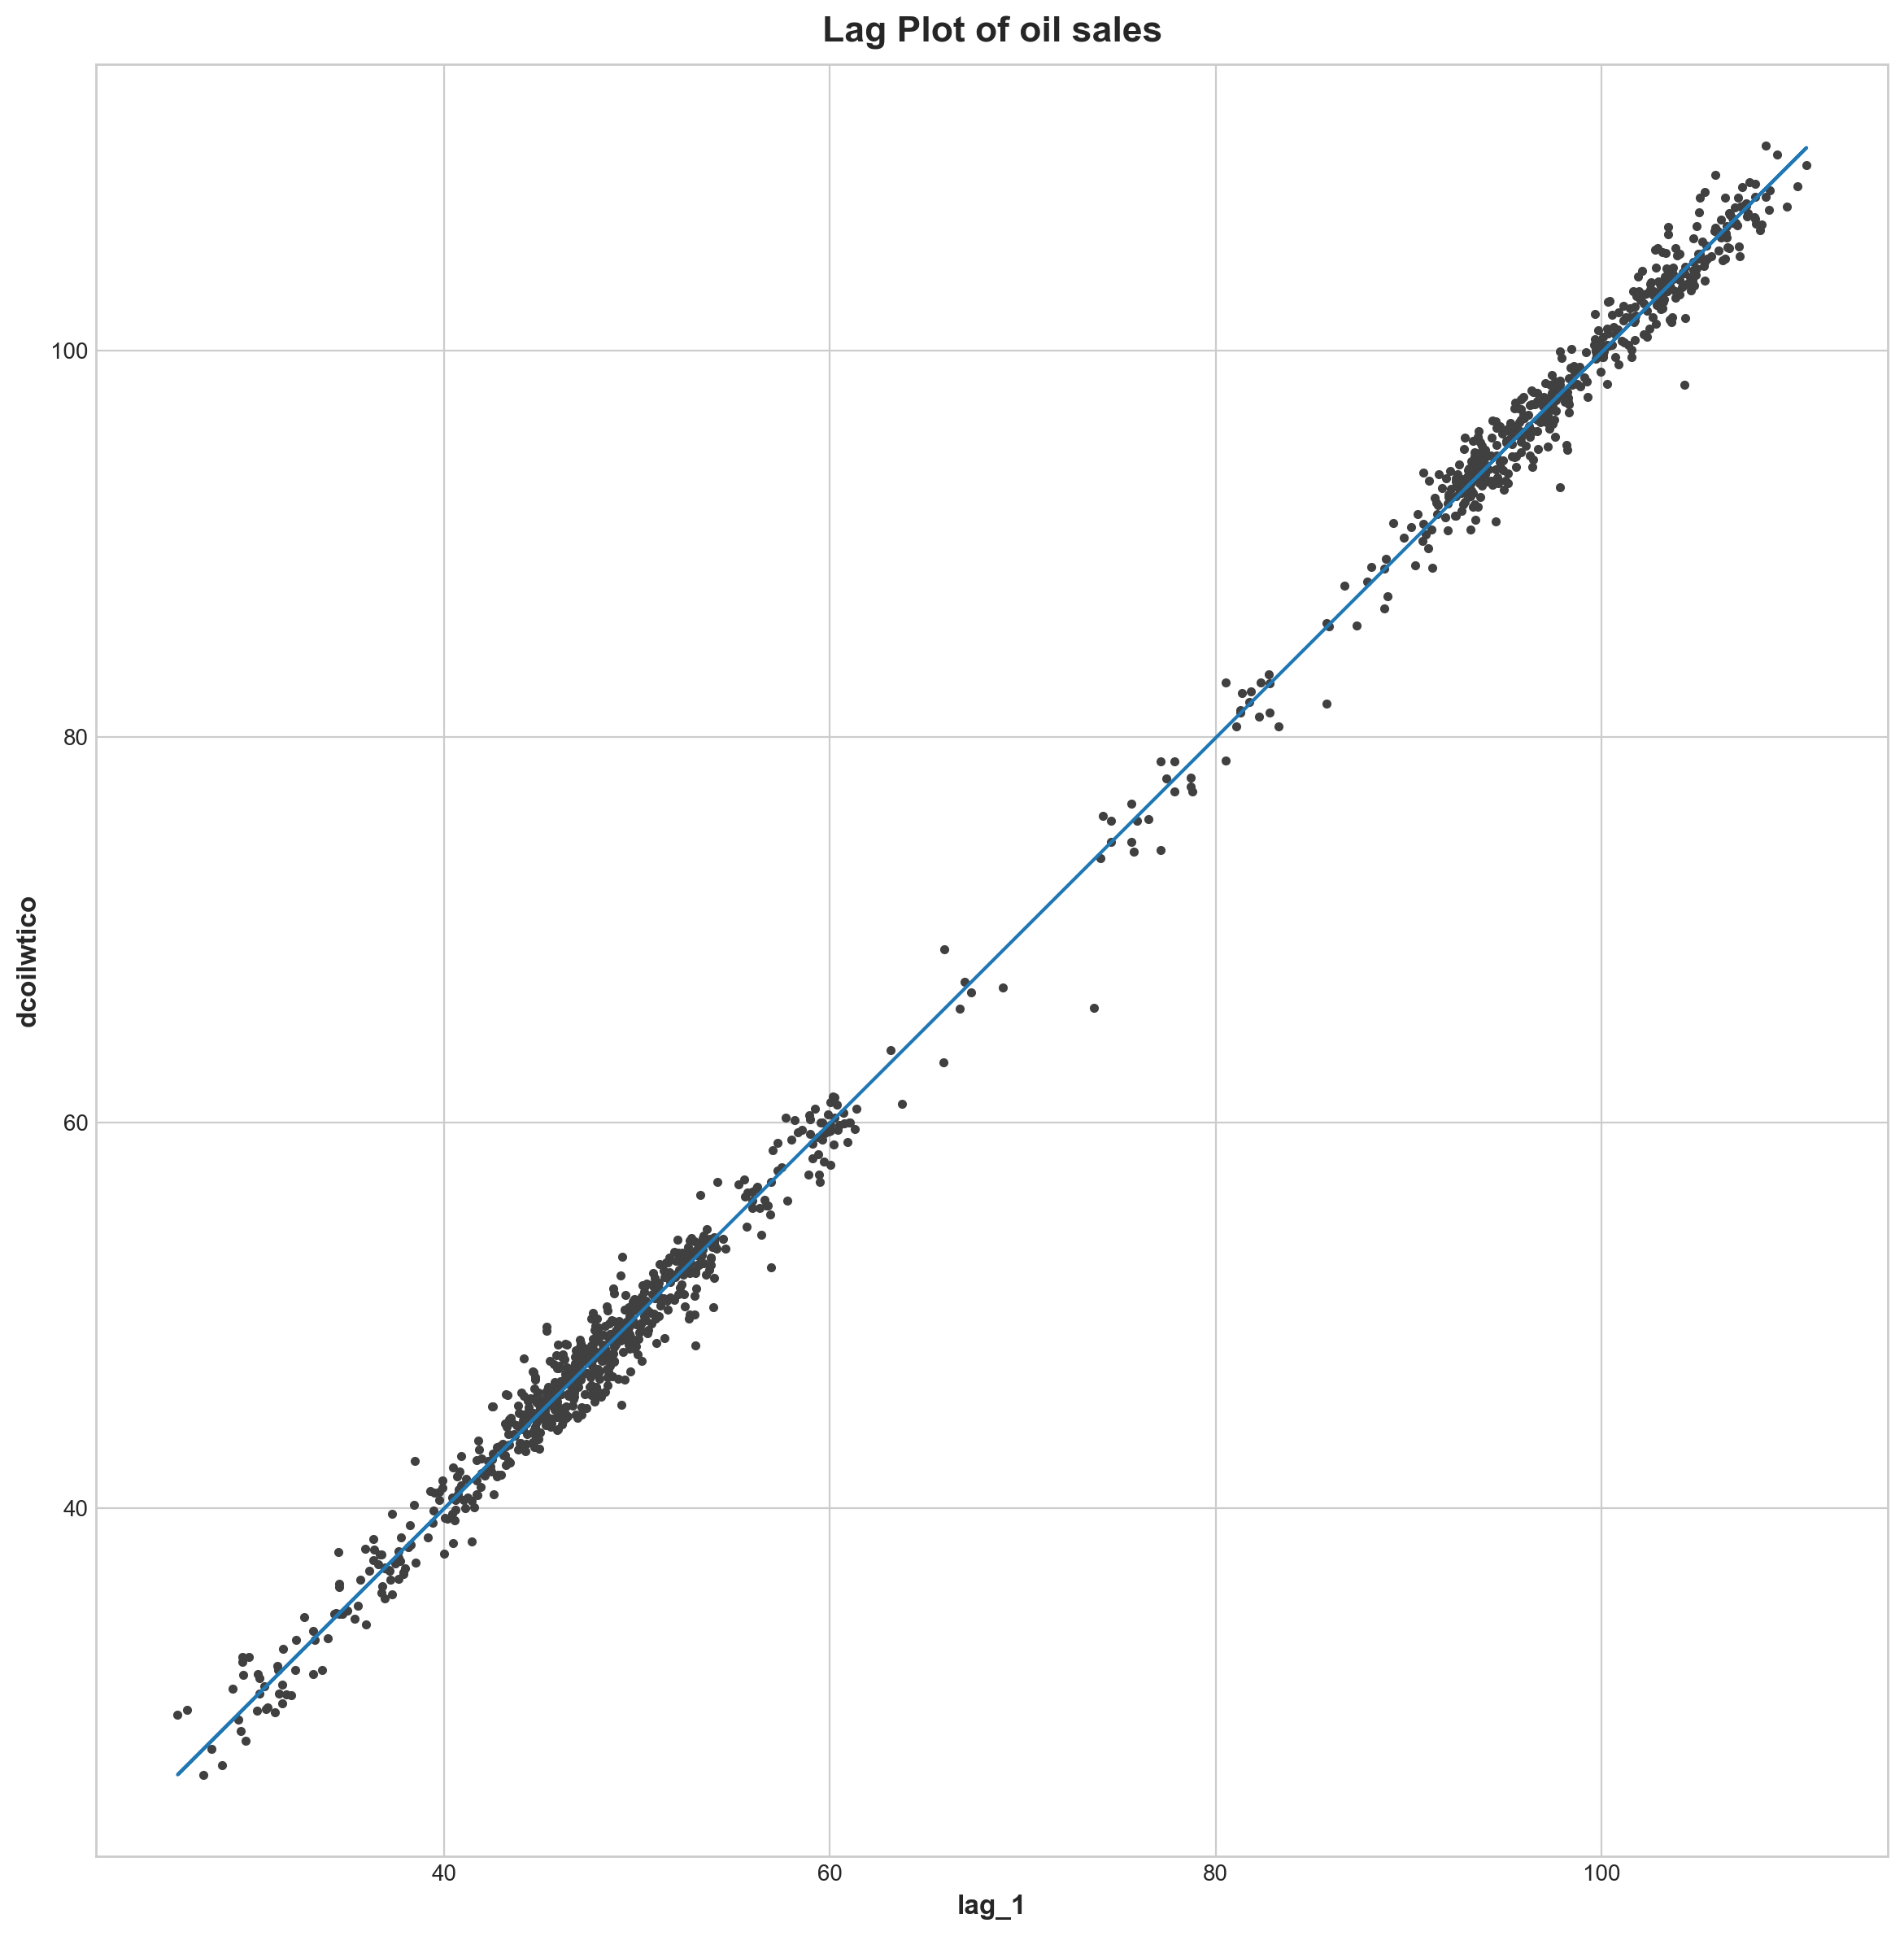

In [ ]:
fig, ax = plt.subplots()
ax.plot(X['lag_1'], y, '.', color='0.25')
ax.plot(X['lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('dcoilwtico')
ax.set_xlabel('lag_1')
ax.set_title('Lag Plot of oil sales')

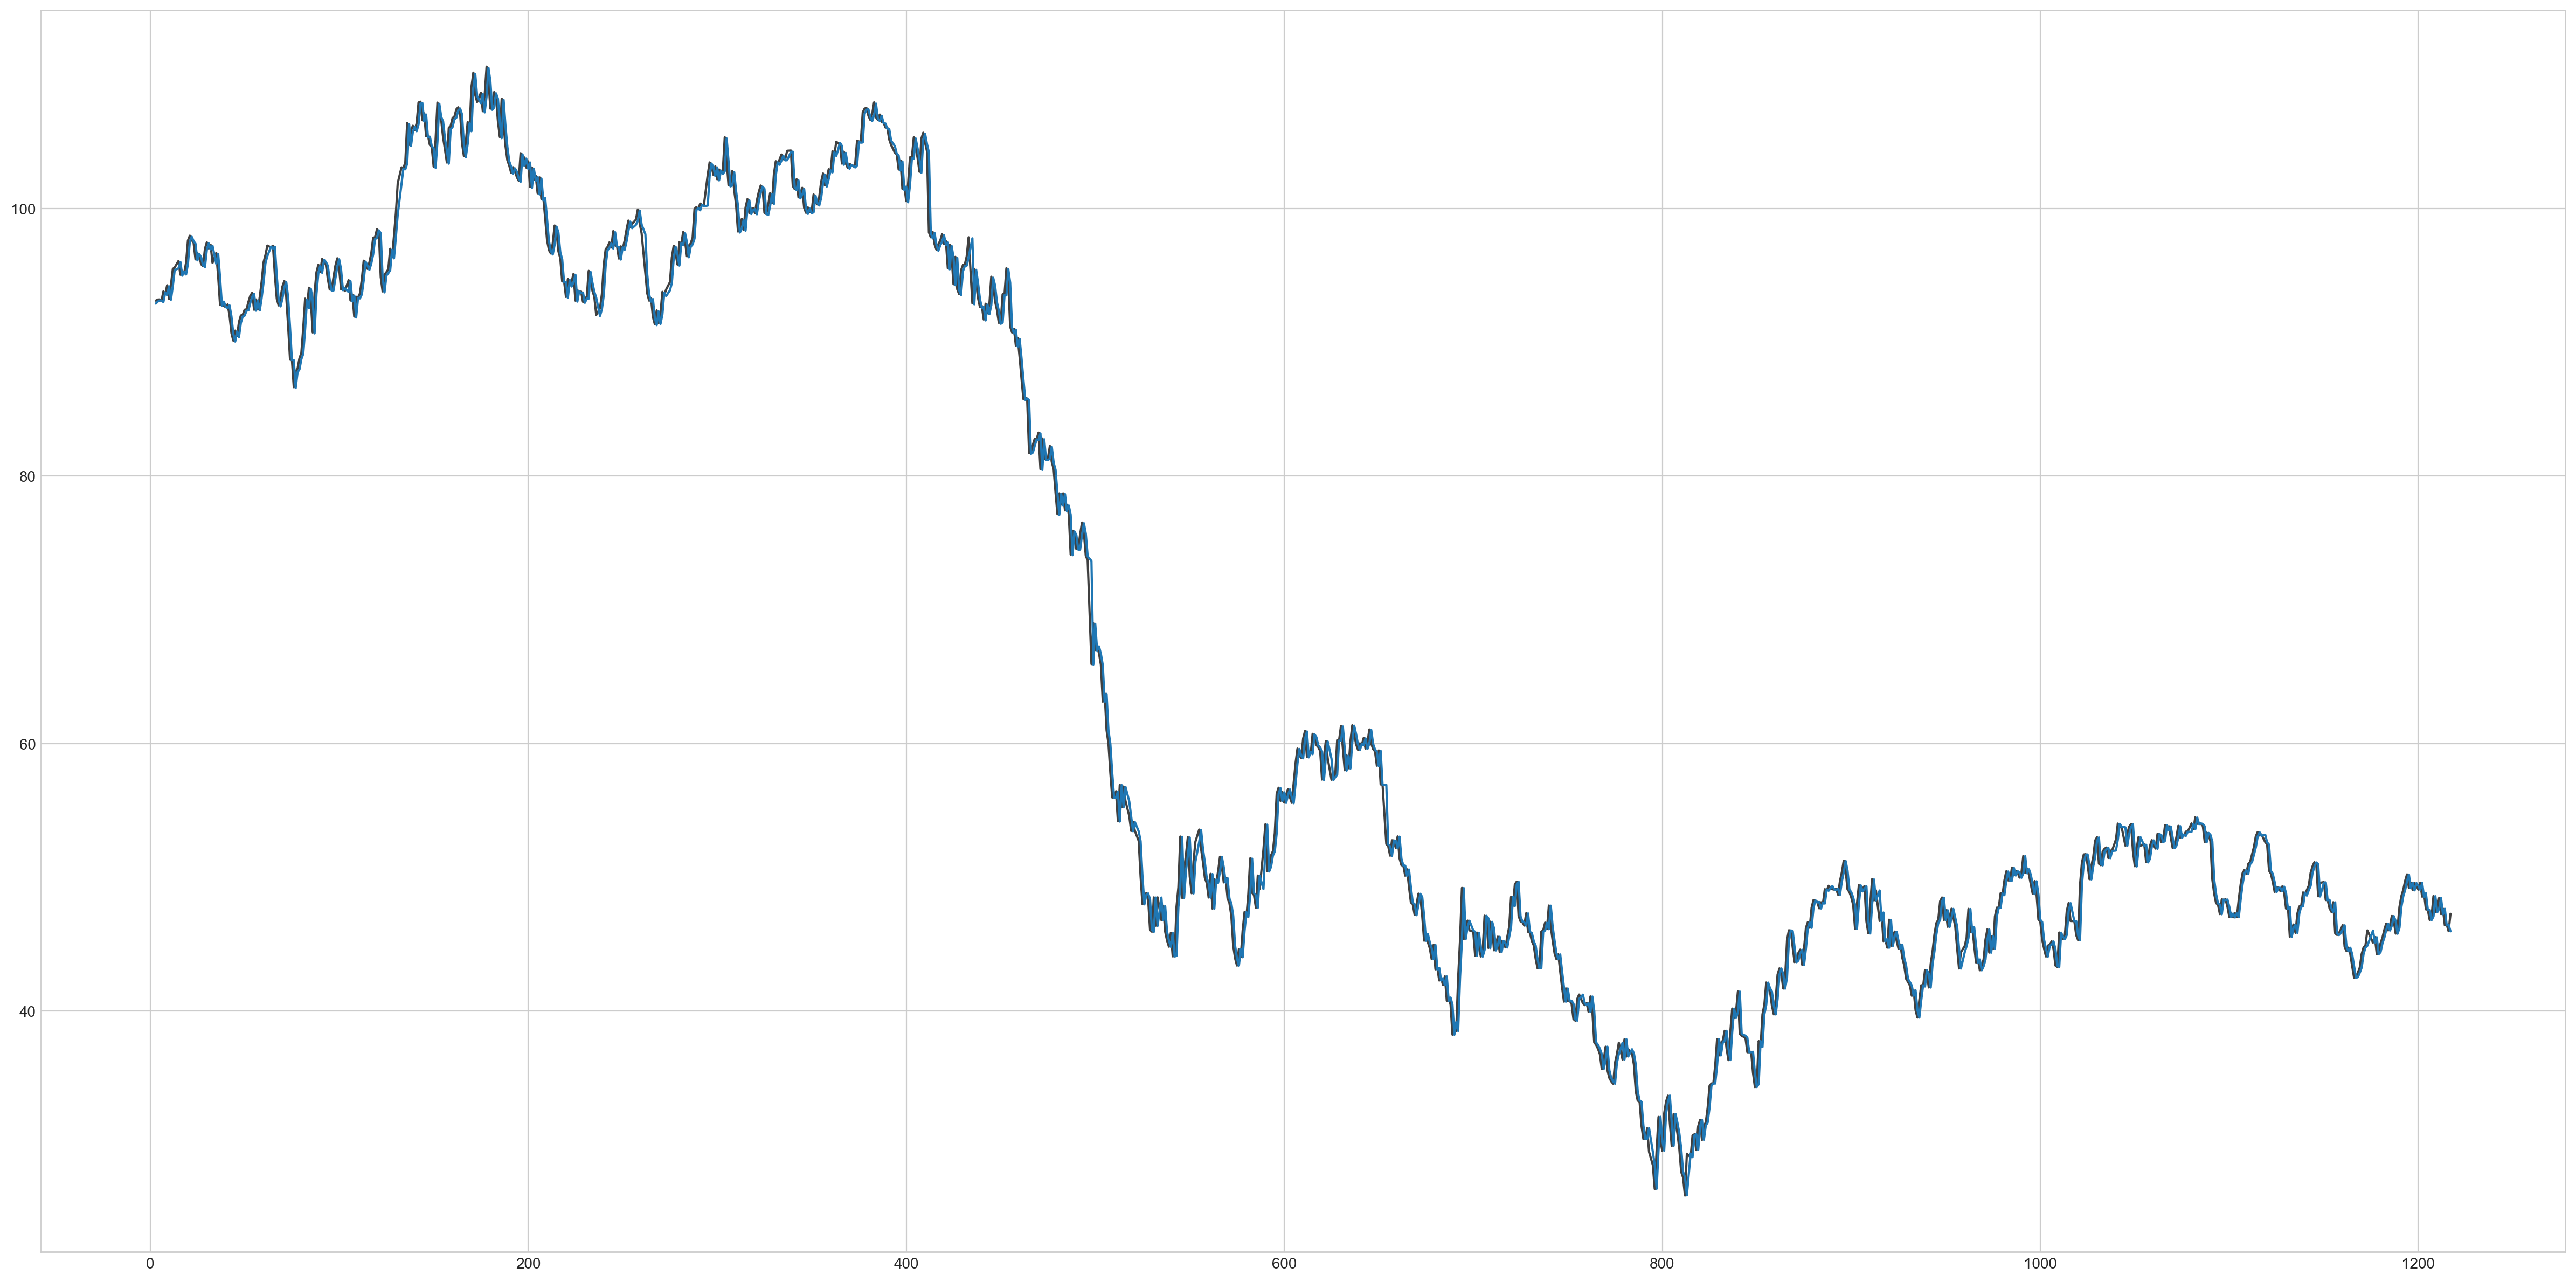

In [ ]:
ax=y.plot(kind='line',color='0.25')
ax=y_pred.plot()

In [73]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simplefilter("ignore")  # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

In [74]:
tunnel=pd.read_csv("D:/HALDEN/Downloads/Tunnel.csv",parse_dates=['Day'])
tunnel.head(10)
tunnel=tunnel.set_index('Day').to_period()

In [75]:
tunnel

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569
...,...
2005-11-12,104646
2005-11-13,94424
2005-11-14,112165


In [81]:
tunnel['Time']=np.arange(len(tunnel.index))
tunnel

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4
...,...,...
2005-11-12,104646,742
2005-11-13,94424,743
2005-11-14,112165,744


Text(0.5, 1.0, 'Time Plot of index')

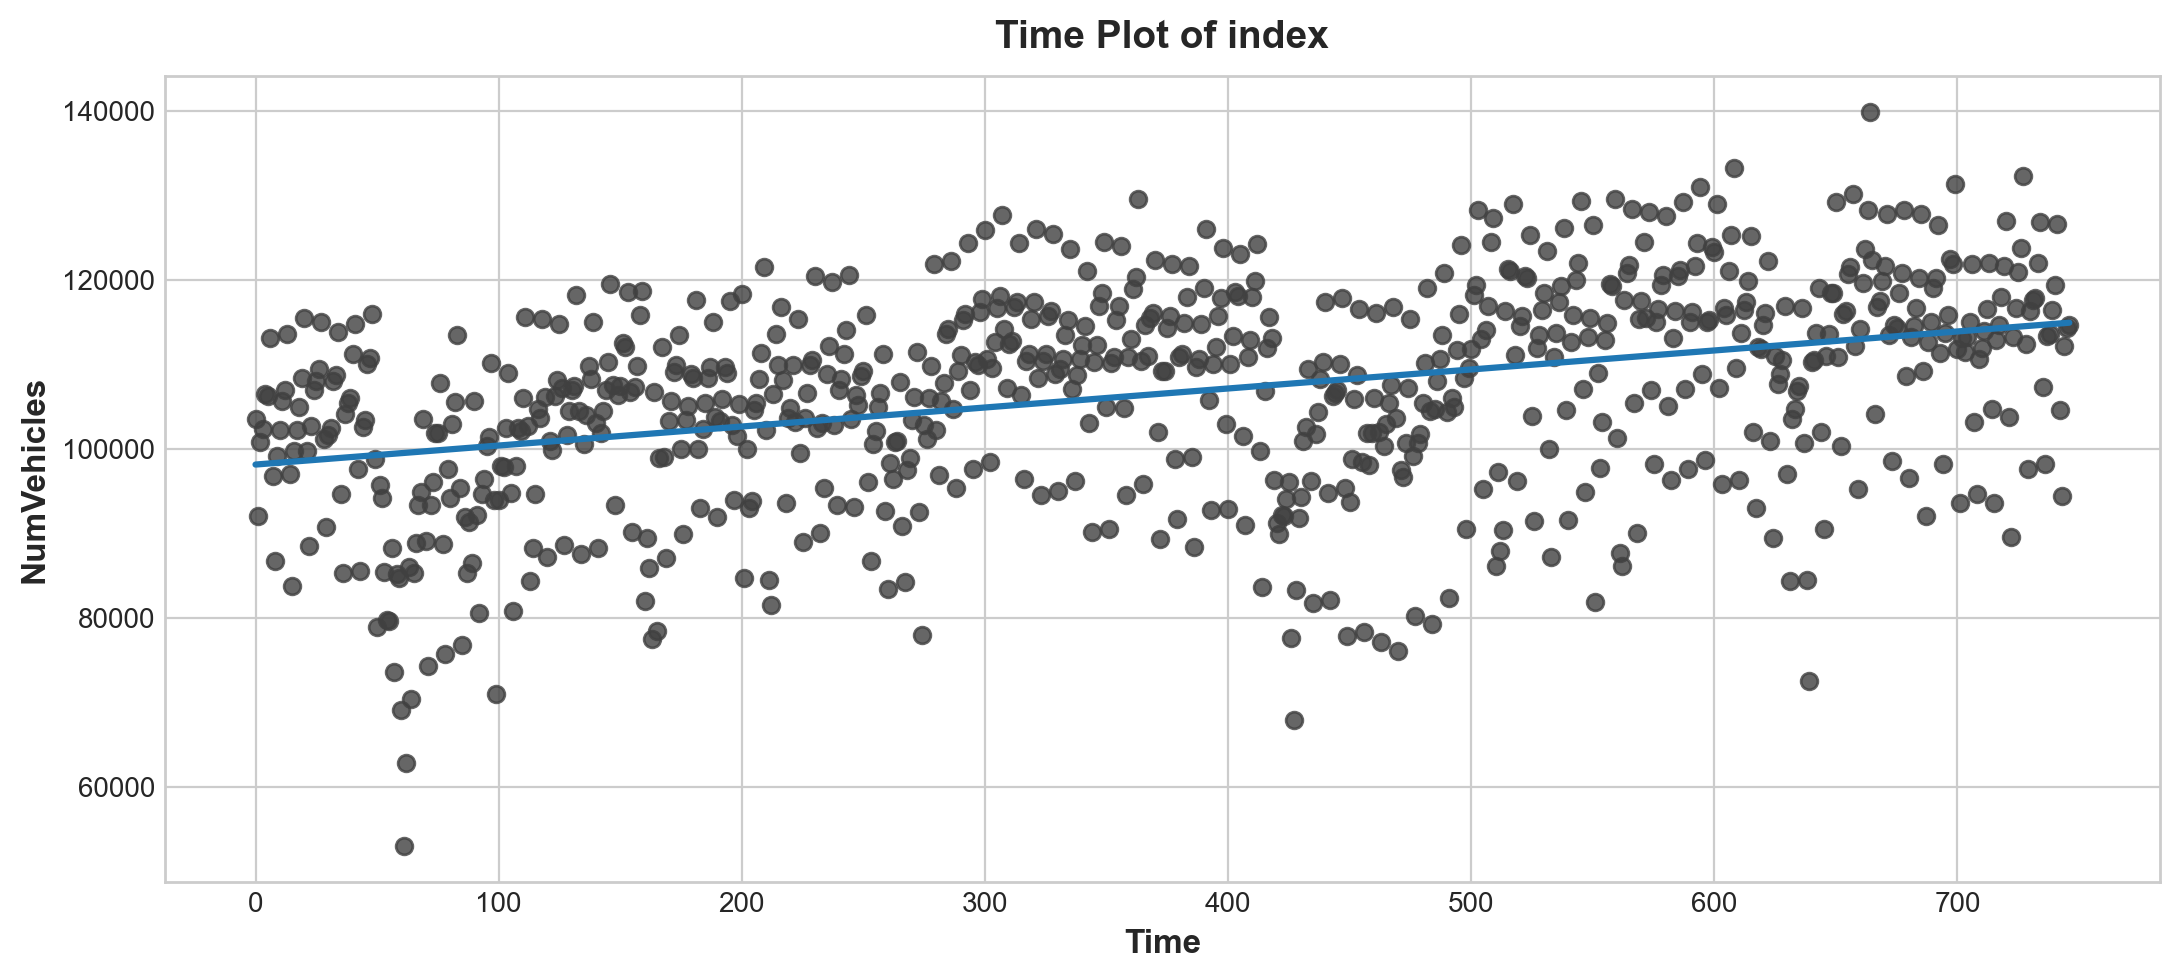

In [85]:
fig, ax=plt.subplots()
#ax.plot("Time",'NumVehicles',data=tunnel,color='0.75')
ax=sns.regplot(x='Time',y="NumVehicles", data=tunnel,ci=None,scatter_kws={'color':'0.25'})
ax.set_title("Time Plot of index")

<AxesSubplot:title={'center':'Tunnel Traffic-365'}, xlabel='Day'>

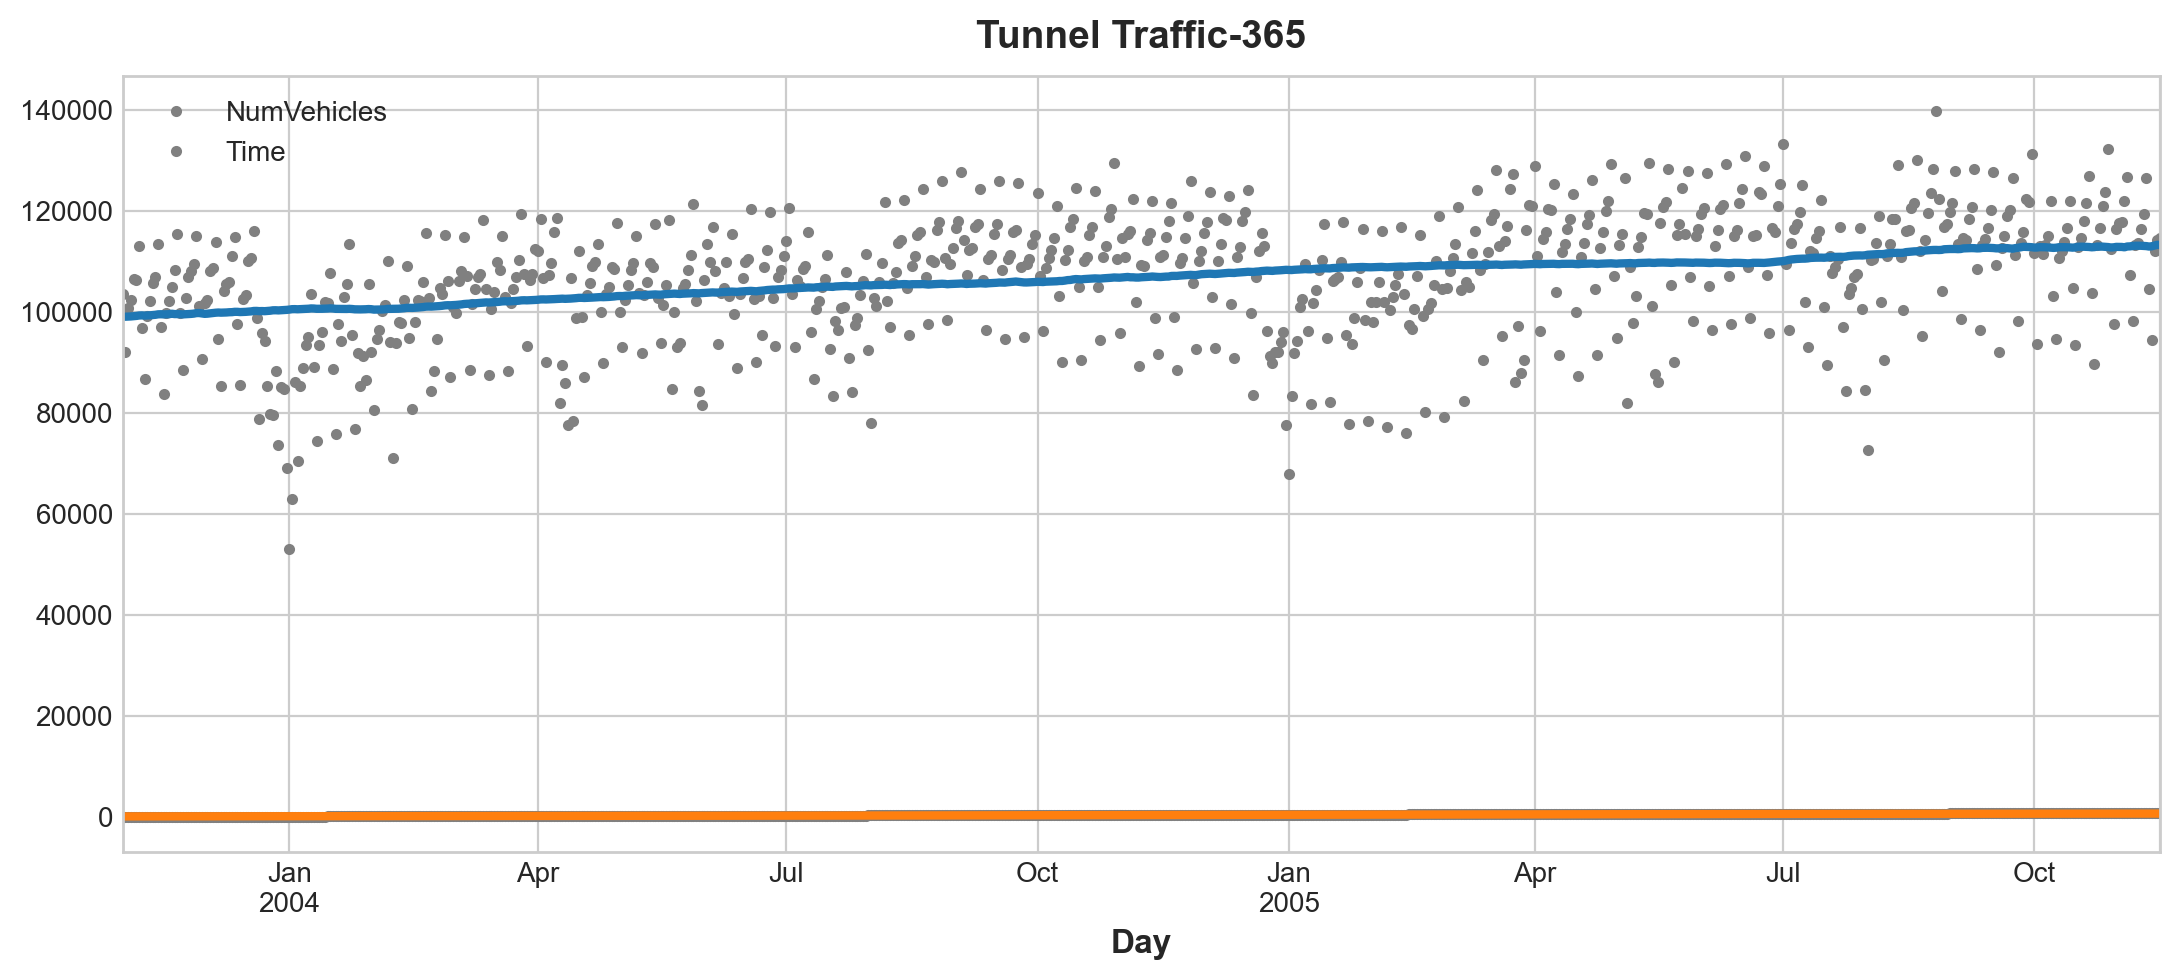

In [86]:
moving_average=tunnel.rolling(window=365, center=True,min_periods=183).mean()
ax=tunnel.plot(style='.',color="0.5")
moving_average.plot(ax=ax,linewidth=3,title="Tunnel Traffic-365",legend=False)

In [103]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp=DeterministicProcess(
    index=tunnel.index,
    constant=True,
    order=3,
    drop=True
    
)
x=dp.in_sample()
x.head()

,const,trend,trend_squared,trend_cubed
Day,,,,
2003-11-01,1.0,1.0,1.0,1.0
2003-11-02,1.0,2.0,4.0,8.0
2003-11-03,1.0,3.0,9.0,27.0
2003-11-04,1.0,4.0,16.0,64.0
2003-11-05,1.0,5.0,25.0,125.0


Deterministic process help us avoid some tricky failure cases that can arise with time series and linear regression

In [104]:
x.shape

(747, 4)

In [105]:
y=tunnel['NumVehicles']

model=LinearRegression(fit_intercept=False)#because of constant values
model.fit(x,y)
y_pred=pd.Series(model.predict(x),index=x.index)


In [106]:
X=dp.out_of_sample(steps=90)
y_fore=pd.Series(model.predict(X),index=X.index)
y_fore.head()

2005-11-17    115230.216338
2005-11-18    115266.852255
2005-11-19    115303.623222
2005-11-20    115340.529670
2005-11-21    115377.572032
Freq: D, dtype: float64

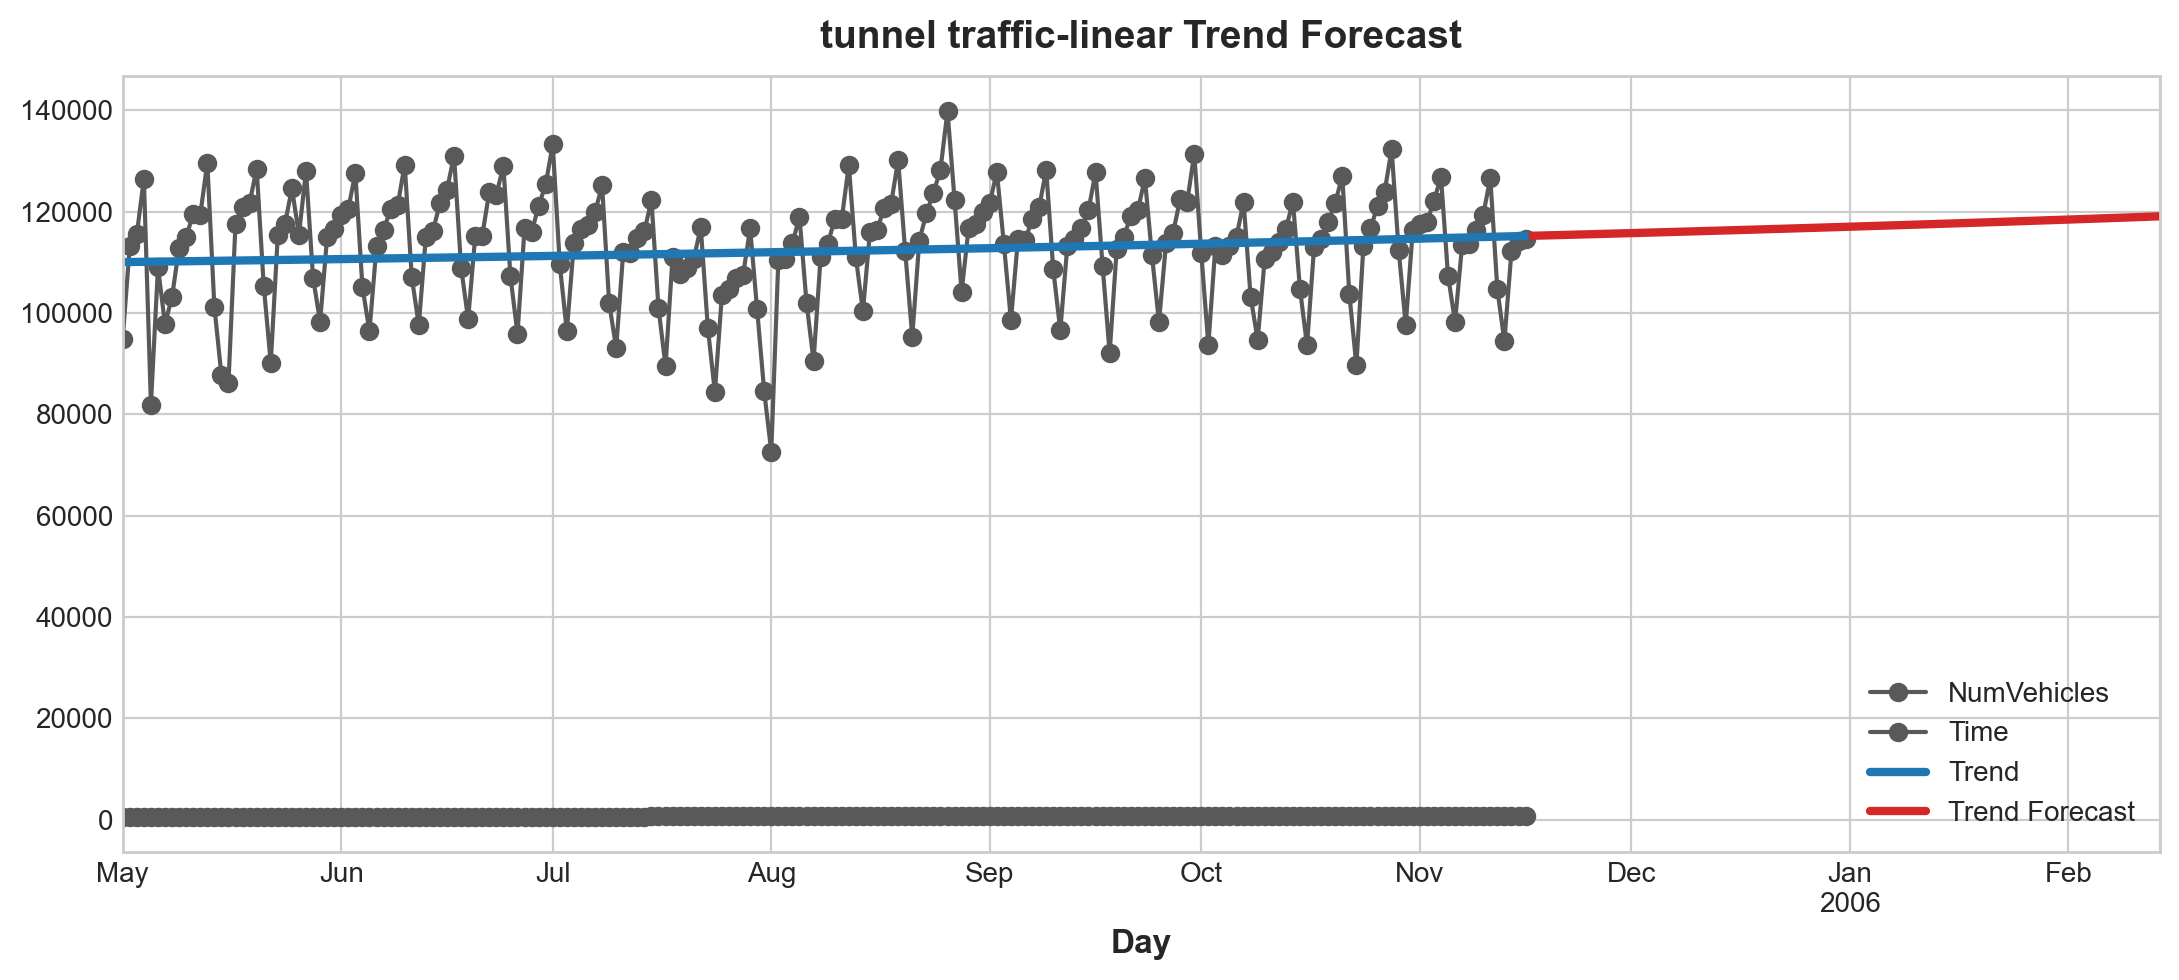

In [107]:
ax=tunnel["2005-05":].plot(title="tunnel traffic-linear Trend Forecast", kind='line', color='0.35',marker='o')
ax = y_pred["2005-05":].plot(ax=ax, linewidth=3, label="Trend")
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
_ = ax.legend()

Seasonality

Seasonality: time series exhibit seasonality when there isa regular, periodic change in the mean of the series and thsi seasonal changes usually follow the clock and calender

seasonality indicators are what you get if you treat a seasonal period as a categorical feature and apply one-hot encoding